## SVM(support vector machine)

아래 3가지 개념을 알고가자

### funtional margin
: 결정경계와 데이터포인트사이의 거리            

$함수 마진 = y_i * (w * x_i + b)$         
y_i : 클래스            
x_i : feature

### SVM의 제약조건

- 1. $y_i * (w * x_i + b) >= 1$
- 2. 만일 1번 조건을 만족하지 못할경우 아래의 '슬랙변수$ξ_i$'를 고려함           
$y_i * (w * x_i + b) >= 1 - ξ_i$ , where $ξ_i>=0$


SVM의 목적은 funitonal margin 을 최대화, 슬랙변수를 최소화하는 것

------

최소화: $1/2 * ||w||^2 + C * Σ(ξ_i)$          
제약 조건: $y_i * (w * x_i + b) >= 1 - ξ_i$         
            $ξ_i >= 0$


-------

위의 수식을 보면 C값의 정체를 알수있다.         


#### 수식의 해석
- 1. funtional margin : 결정경계와 데이터 포인트 사이의 거리
- 2. 슬랙 변수 : funtional margin이 설명하지 못하는 오류
- 3. c : 슬랙변수에 대한 패널티(커질수록 오류를 허용하지 않으니, 훈련데이터에 맞추기 위해 작동함)

### Kernal funtion(커널함수)
데이터간의 유사도를 추정하기 위한 함수

$K(x, x') = exp(-γ * ||x - x'||^2)$

* 참고
> 고차원으로 변환한다는 뜻 : 데이터 포인트 하나가 다른 포인터들관의 거리를 이용한 커널함수값들의 데이터포인트들(고차원)로 변환(1 to n-1)

#### $\gamma$(감마)의 해석
$\gamma$(감마)가 커질수록 커널함수(RBF함수를 이용했을시)의 값이 작아짐. 즉 데이터 사이의 거리에 대한 영향력이 작아짐

### 파라미터의 최종해석
- 1. C : 이상치, 오류에 대한 허용정도를 나타냄
- 2. Gamma : 데이터 사이의 거리에 유효성에 대한 제한이며, 클수록 데이터 거리의 영향력이 떨어져 여러개의 결정 경계선이 생김

## 실습

In [96]:
import sklearn.svm as sksvm
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpre
import sklearn.model_selection as skmod
import sklearn.metrics as skmet    

In [97]:
Data=pd.read_excel('C:/Users/User/Desktop/Raisin_Dataset/Raisin_Dataset.xlsx')

In [98]:
data=pd.DataFrame(Data)

In [99]:
data.head(3)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [101]:
data["Class"].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

### 표준화
> 데이터의 거리를 이용하기 때문에 스케일링이 강제

In [102]:
target='Class'
feature=data.columns.difference(["Class","Area"])

In [103]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: >

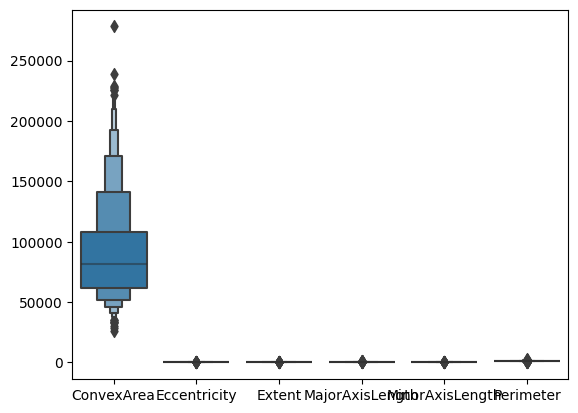

In [104]:
plt.figure()
sb.boxenplot(data[feature])

위의 결과를 보면 `convex area`의 값의 범위가 굉장히 다른 값들과 다름을 보임         
`minmax scalrer`를 이용하자

In [105]:
pre_feature=pd.DataFrame(data=skpre.minmax_scale(X=data[feature]),columns=feature)
pre_data=pd.merge(data[target],pre_feature,right_index=True,left_index=True)

<Axes: >

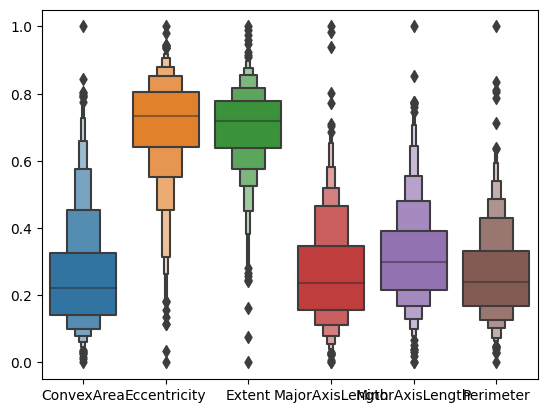

In [106]:
plt.figure()
sb.boxenplot(pre_data[feature])

이상치가 발견되므로, C값을 조절해 이상치의 수용정도를 생각해봐야함

#### 데이터 분리

In [107]:
import numpy as np
np.random.seed(10)

층화추출

In [108]:
train,test=skmod.train_test_split(pre_data,train_size=0.7,random_state=10,stratify=pre_data["Class"])

모델 생성
> 임의로 파라미터를 정한것이므로 최적화가 필요함

In [109]:
svm=sksvm.SVC(C=3,kernel='rbf',gamma=10)

In [110]:
svm.fit(X=train[feature],y=train[target])

SVC(C=3, gamma=10)

In [111]:
svm.score(X=train[feature],y=train[target])

0.873015873015873

In [112]:
svm.score(X=test[feature],y=test[target])

0.8592592592592593